In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import calendar

In [2]:
df=pd.read_csv('../Data/energydata_complete.csv',index_col='date',header=0)
df['datetime'] = df.index
df['datetime'] = pd.to_datetime(df['datetime'])
df['day_of_week']=df['datetime'].dt.strftime('%w').astype('int64')
df['month']=df['datetime'].dt.strftime('%m').astype('int64')
df['hour']=df['datetime'].dt.hour
df['day_number']=df['datetime'].dt.day
df['Week_no'] = df['datetime'].dt.strftime('%W').astype('int64')
df['min'] = df['datetime'].dt.minute
df['day_of_week']=df['day_of_week'].apply(str)
df['hour']=df['hour'].apply(str)
df['min']=df['min'].apply(str)
df['period']=df[['day_of_week','hour','min']].apply(lambda x:''.join(x),axis=1)

In [4]:
phase = df.groupby(['date','month','day_of_week','hour','day_number','min','datetime','period']).mean()
phase["Total"]=phase["Appliances"] + phase["lights"]
phase = phase.reset_index()
phase.set_index('date', inplace=True)
phase['day_of_week']=phase['day_of_week'].apply(int)
phase['hour']=phase['hour'].apply(int)
phase['min']=phase['min'].apply(int)
phase['period']=phase['period'].apply(int)
phase['Press_mm_hg'] = np.log(phase['Press_mm_hg'])
phase['Visibility'] = np.log(phase['Visibility'])

phase1 = phase
phase1.drop(['datetime','lights','Total','rv1','rv2'],axis=1,inplace=True)
y = phase1["Appliances"]
X=phase1.drop("Appliances",axis=1)

## 1.6 Relationship between Features 

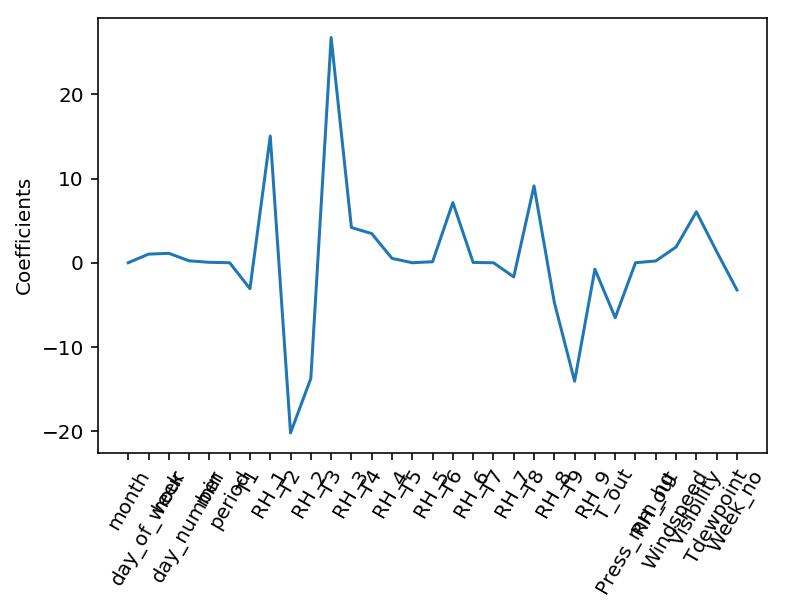

In [5]:
from sklearn.linear_model import Lasso
names = phase1.drop('Appliances',axis=1).columns
lasso =Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
_=plt.plot(range(len(names)),lasso_coef)
_=plt.xticks(range(len(names)),names, rotation=60)
_=plt.ylabel('Coefficients')
plt.show()

## 1.7 ECDF Plots

### All temperature variable 

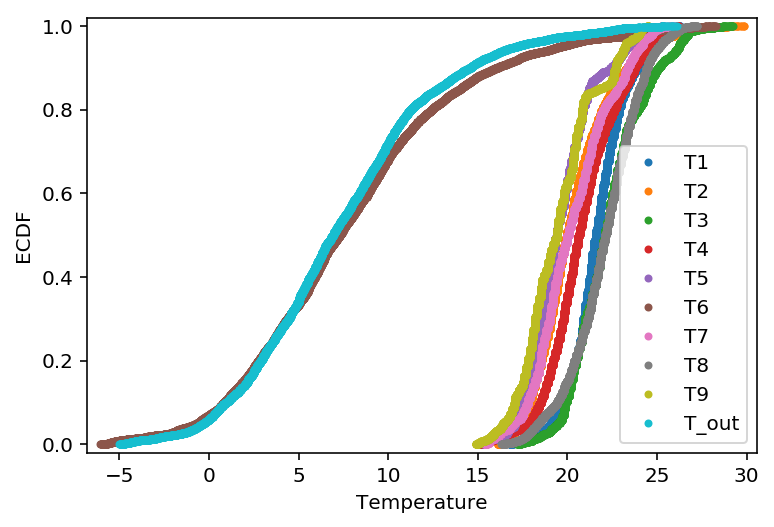

In [6]:
x_t1 = np.sort(phase1['T1'])
y_t1 = np.arange(1, len(x_t1)+1)/len(x_t1)

x_t2 = np.sort(phase1['T2'])
y_t2 = np.arange(1, len(x_t2)+1)/len(x_t2)

x_t3 = np.sort(phase1['T3'])
y_t3 = np.arange(1, len(x_t3)+1)/len(x_t3)

x_t4 = np.sort(phase1['T4'])
y_t4 = np.arange(1, len(x_t4)+1)/len(x_t4)

x_t5 = np.sort(phase1['T5'])
y_t5 = np.arange(1, len(x_t5)+1)/len(x_t5)

x_t6 = np.sort(phase1['T6'])
y_t6 = np.arange(1, len(x_t6)+1)/len(x_t6)

x_t7 = np.sort(phase1['T7'])
y_t7 = np.arange(1, len(x_t7)+1)/len(x_t7)

x_t8 = np.sort(phase1['T8'])
y_t8 = np.arange(1, len(x_t8)+1)/len(x_t8)

x_t9 = np.sort(phase1['T9'])
y_t9 = np.arange(1, len(x_t9)+1)/len(x_t9)

x_tout = np.sort(phase1['T_out'])
y_tout = np.arange(1, len(x_tout)+1)/len(x_tout)


_=plt.plot(x_t1,y_t1,marker='.',linestyle='none')
_=plt.plot(x_t2,y_t2,marker='.',linestyle='none')
_=plt.plot(x_t3,y_t3,marker='.',linestyle='none')
_=plt.plot(x_t4,y_t4,marker='.',linestyle='none')
_=plt.plot(x_t5,y_t5,marker='.',linestyle='none')
_=plt.plot(x_t6,y_t6,marker='.',linestyle='none')
_=plt.plot(x_t7,y_t7,marker='.',linestyle='none')
_=plt.plot(x_t8,y_t8,marker='.',linestyle='none')
_=plt.plot(x_t9,y_t9,marker='.',linestyle='none')
_=plt.plot(x_tout,y_tout,marker='.',linestyle='none')


plt.margins(0.02)
plt.legend(('T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out'), loc='lower right')
_= plt.xlabel('Temperature')
_=plt.ylabel('ECDF')

plt.show()

### All humidity variable

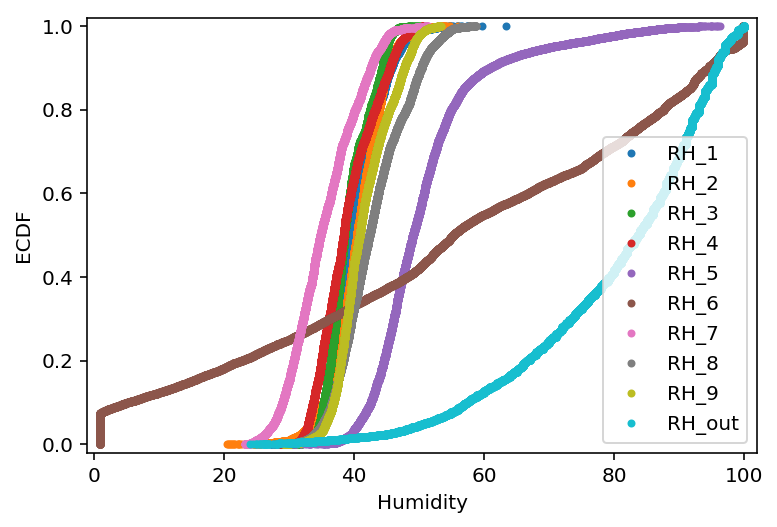

In [7]:
x_rh1 = np.sort(phase1['RH_1'])
y_rh1 = np.arange(1, len(x_rh1)+1)/len(x_rh1)

x_rh2 = np.sort(phase1['RH_2'])
y_rh2 = np.arange(1, len(x_rh2)+1)/len(x_rh2)

x_rh3 = np.sort(phase1['RH_3'])
y_rh3 = np.arange(1, len(x_rh3)+1)/len(x_rh3)

x_rh4 = np.sort(phase1['RH_4'])
y_rh4 = np.arange(1, len(x_rh4)+1)/len(x_rh4)

x_rh5 = np.sort(phase1['RH_5'])
y_rh5 = np.arange(1, len(x_rh5)+1)/len(x_rh5)

x_rh6 = np.sort(phase1['RH_6'])
y_rh6 = np.arange(1, len(x_rh6)+1)/len(x_rh6)

x_rh7 = np.sort(phase1['RH_7'])
y_rh7 = np.arange(1, len(x_rh7)+1)/len(x_rh7)

x_rh8 = np.sort(phase1['RH_8'])
y_rh8 = np.arange(1, len(x_rh8)+1)/len(x_rh8)

x_rh9 = np.sort(phase1['RH_9'])
y_rh9 = np.arange(1, len(x_rh9)+1)/len(x_rh9)

x_rhout = np.sort(phase1['RH_out'])
y_rhout = np.arange(1, len(x_rhout)+1)/len(x_rhout)


_=plt.plot(x_rh1,y_rh1,marker='.',linestyle='none')
_=plt.plot(x_rh2,y_rh2,marker='.',linestyle='none')
_=plt.plot(x_rh3,y_rh3,marker='.',linestyle='none')
_=plt.plot(x_rh4,y_rh4,marker='.',linestyle='none')
_=plt.plot(x_rh5,y_rh5,marker='.',linestyle='none')
_=plt.plot(x_rh6,y_rh6,marker='.',linestyle='none')
_=plt.plot(x_rh7,y_rh7,marker='.',linestyle='none')
_=plt.plot(x_rh8,y_rh8,marker='.',linestyle='none')
_=plt.plot(x_rh9,y_rh9,marker='.',linestyle='none')
_=plt.plot(x_rhout,y_rhout,marker='.',linestyle='none')


plt.margins(0.02)
plt.legend(('RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out'), loc='lower right')
_= plt.xlabel('Humidity')
_=plt.ylabel('ECDF')

plt.show()

In [8]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y
n = len(phase1['Appliances'])    

### Appliances

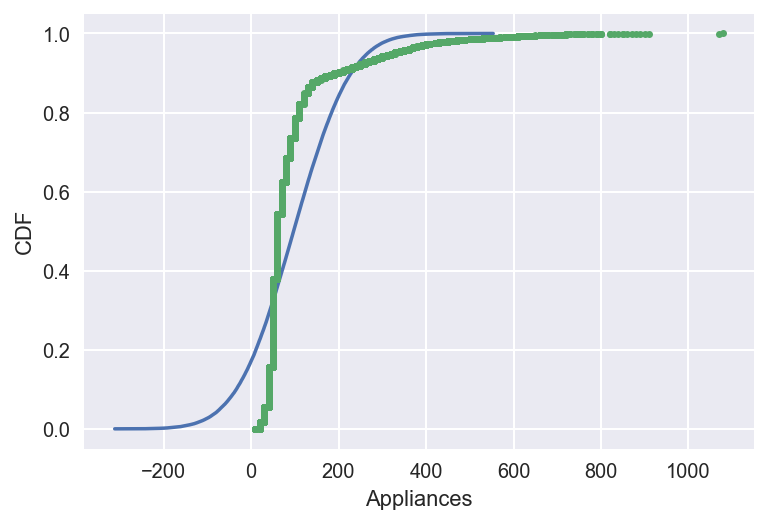

In [9]:
mean = np.mean(phase1['Appliances'])
std = np.std(phase1['Appliances'])
samples = np.random.normal(mean,std,size = 100000)
x,y = ecdf(phase1['Appliances'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('Appliances')
_=plt.ylabel('CDF')
plt.show()

### T1

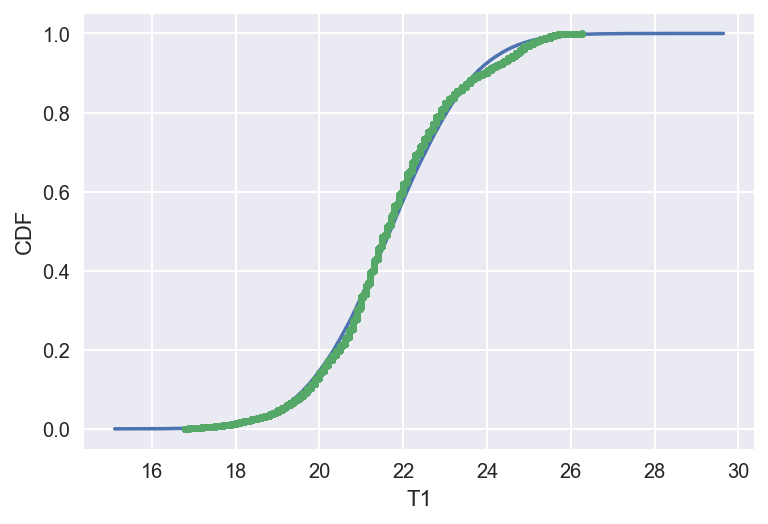

In [10]:
mean = np.mean(phase1['T1'])
std = np.std(phase1['T1'])
samples = np.random.normal(mean,std,size = 100000)
x,y = ecdf(phase1['T1'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T1')
_=plt.ylabel('CDF')
plt.show()

### T2

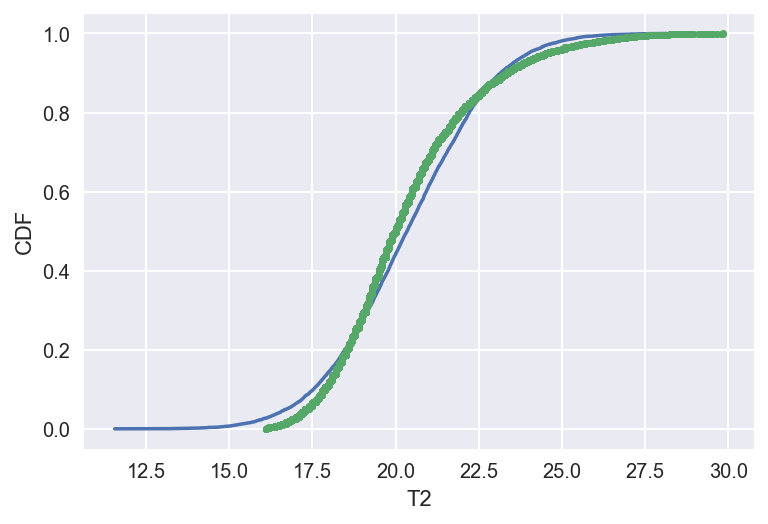

In [11]:
mean = np.mean(phase1['T2'])
std = np.std(phase1['T2'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['T2'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T2')
_=plt.ylabel('CDF')
plt.show()

### T3

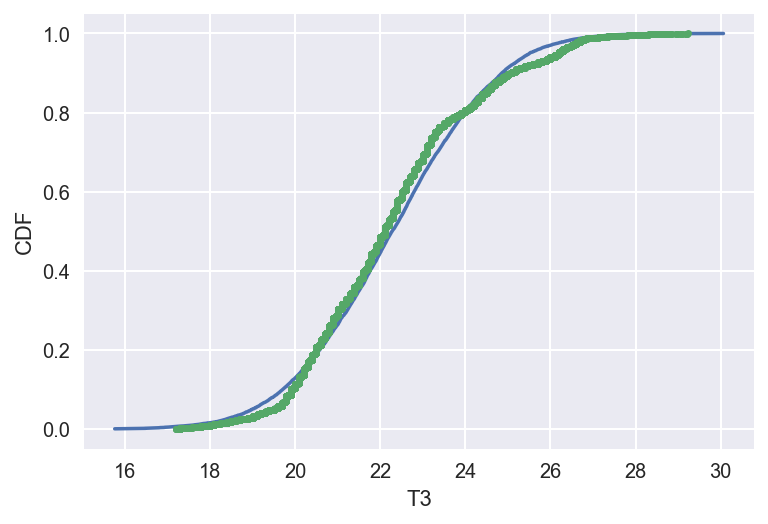

In [12]:
mean = np.mean(phase1['T3'])
std = np.std(phase1['T3'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['T3'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T3')
_=plt.ylabel('CDF')
plt.show()

### T4

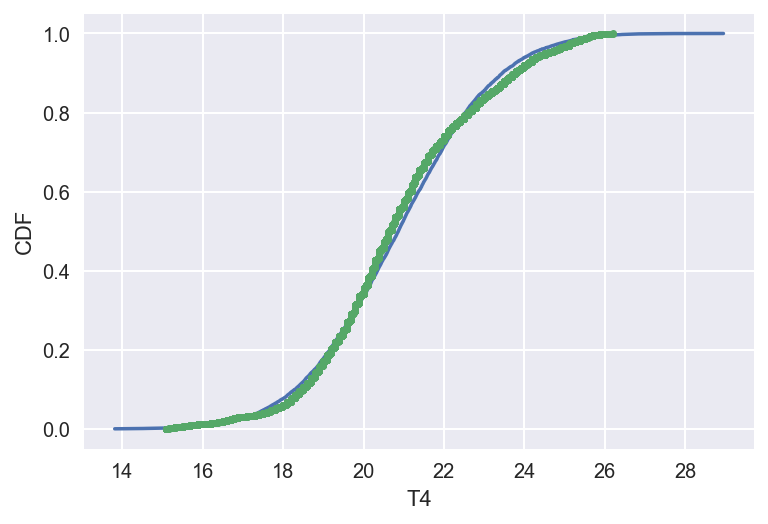

In [13]:
mean = np.mean(phase1['T4'])
std = np.std(phase1['T4'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['T4'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T4')
_=plt.ylabel('CDF')
plt.show()

### T5

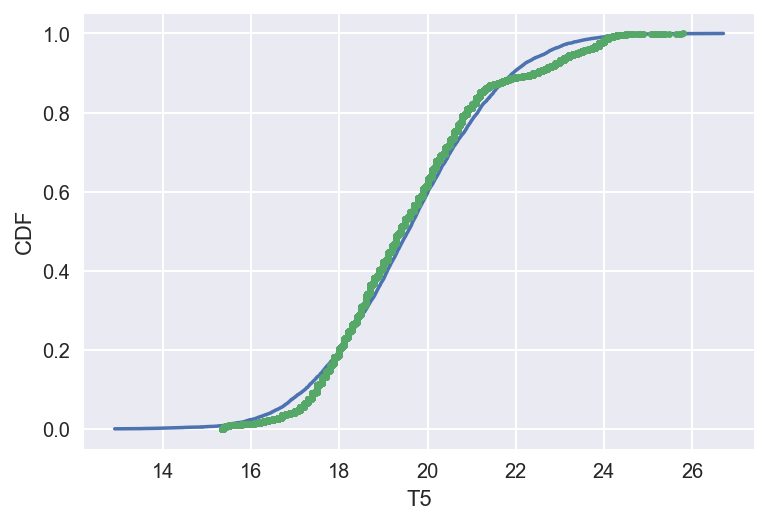

In [14]:
mean = np.mean(phase1['T5'])
std = np.std(phase1['T5'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['T5'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T5')
_=plt.ylabel('CDF')
plt.show()

### T6

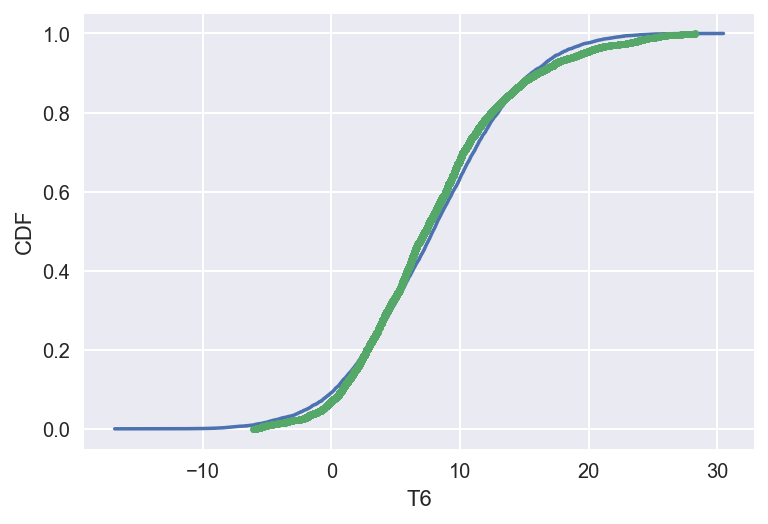

In [15]:
mean = np.mean(phase1['T6'])
std = np.std(phase1['T6'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['T6'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T6')
_=plt.ylabel('CDF')
plt.show()

### T7

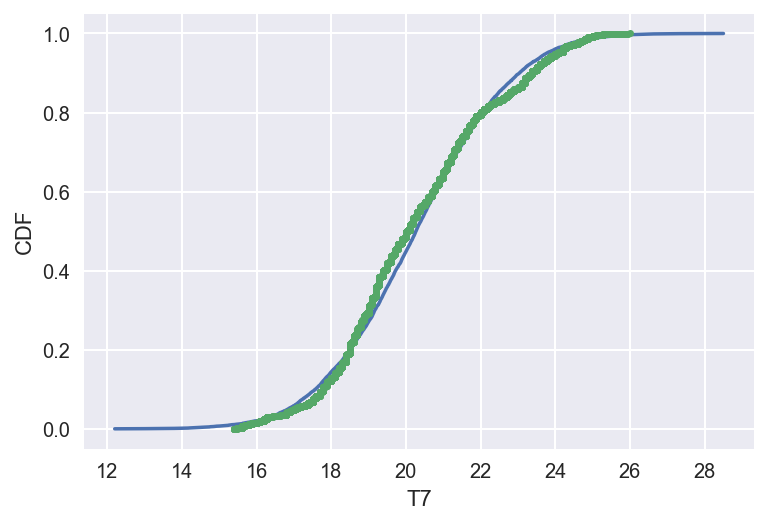

In [16]:
mean = np.mean(phase1['T7'])
std = np.std(phase1['T7'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['T7'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T7')
_=plt.ylabel('CDF')
plt.show()

### T8

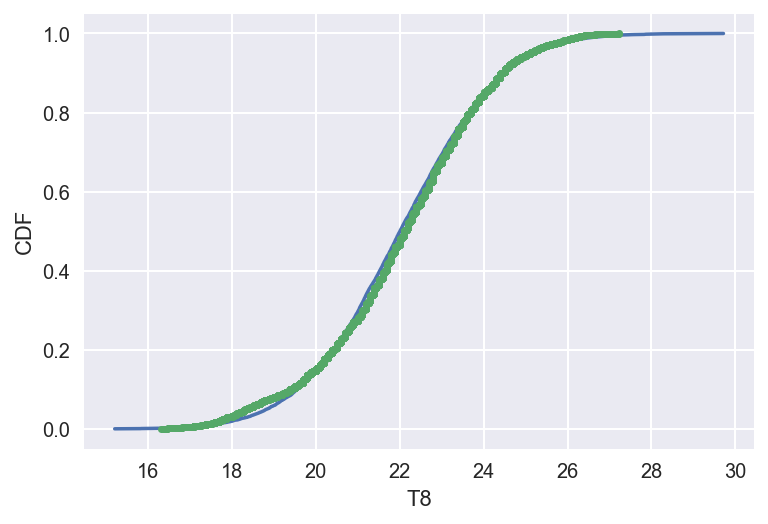

In [17]:
mean = np.mean(phase1['T8'])
std = np.std(phase1['T8'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['T8'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T8')
_=plt.ylabel('CDF')
plt.show()

### T9

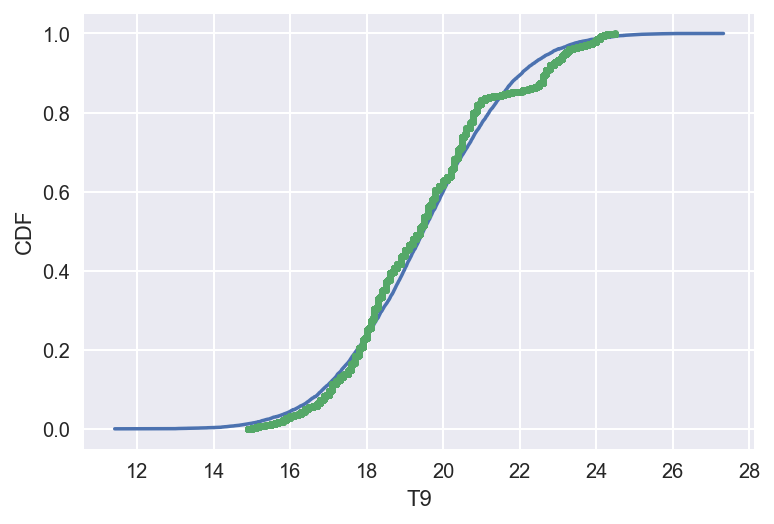

In [18]:
mean = np.mean(phase1['T9'])
std = np.std(phase1['T9'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['T9'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T9')
_=plt.ylabel('CDF')
plt.show()

### T_out

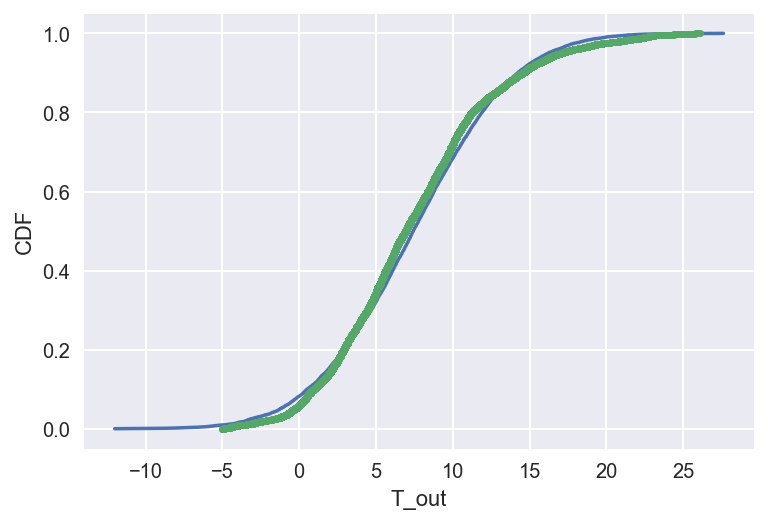

In [19]:
mean = np.mean(phase1['T_out'])
std = np.std(phase1['T_out'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['T_out'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('T_out')
_=plt.ylabel('CDF')
plt.show()

### RH_1

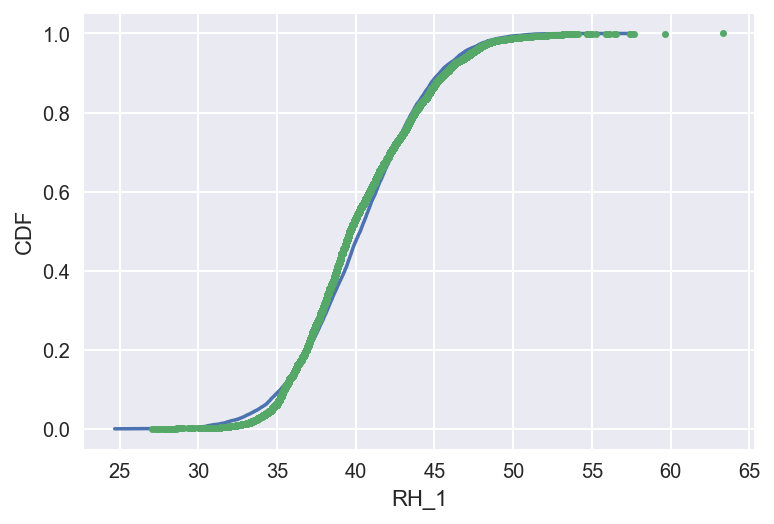

In [20]:
mean = np.mean(phase1['RH_1'])
std = np.std(phase1['RH_1'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['RH_1'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_1')
_=plt.ylabel('CDF')
plt.show()

### RH_2

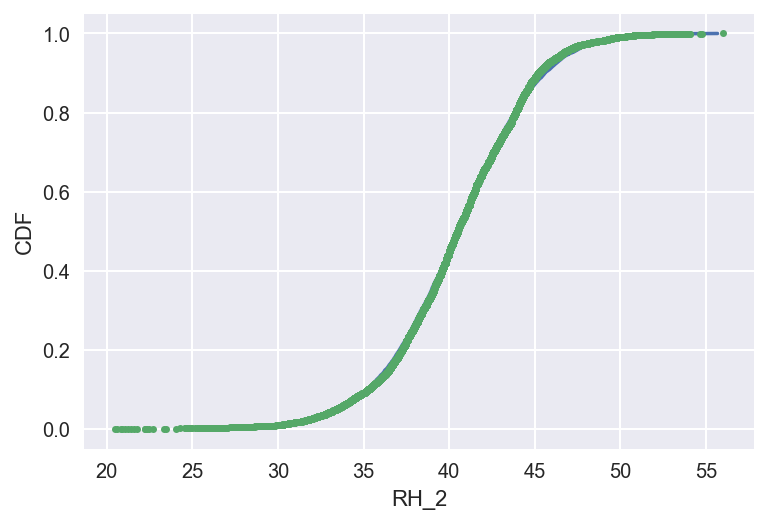

In [21]:
mean = np.mean(phase1['RH_2'])
std = np.std(phase1['RH_2'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['RH_2'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_2')
_=plt.ylabel('CDF')
plt.show()

### RH_3

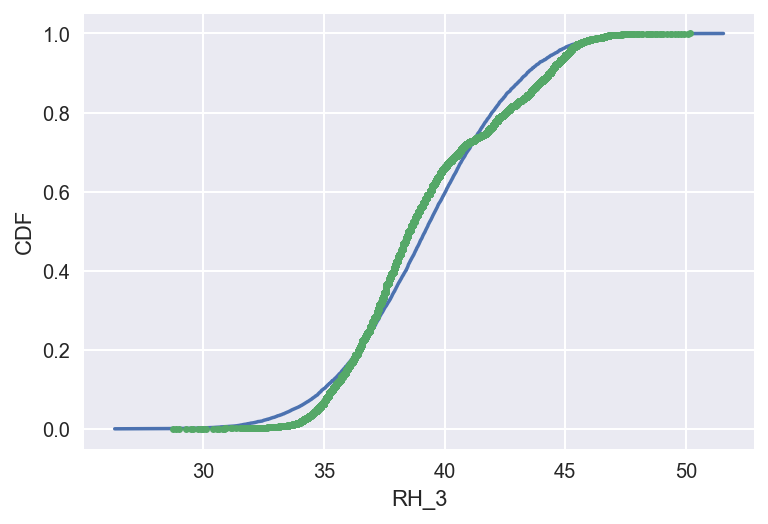

In [22]:
mean = np.mean(phase1['RH_3'])
std = np.std(phase1['RH_3'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['RH_3'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_3')
_=plt.ylabel('CDF')
plt.show()

### RH_4

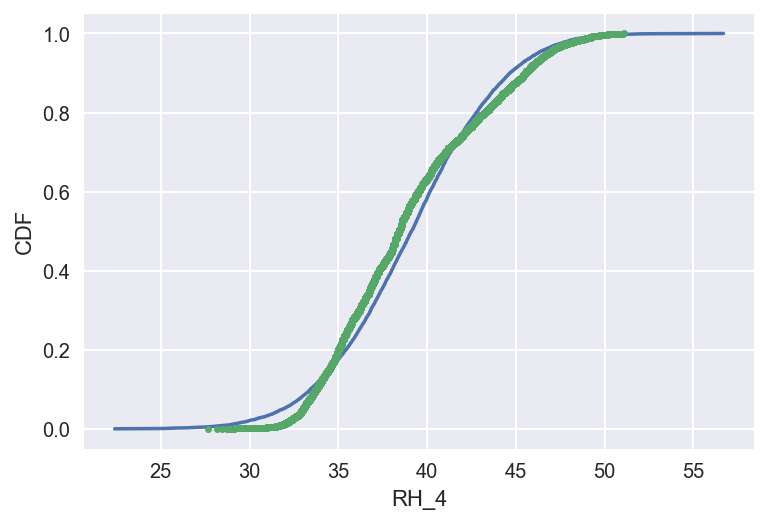

In [23]:
mean = np.mean(phase1['RH_4'])
std = np.std(phase1['RH_4'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['RH_4'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_4')
_=plt.ylabel('CDF')
plt.show()

### RH_5

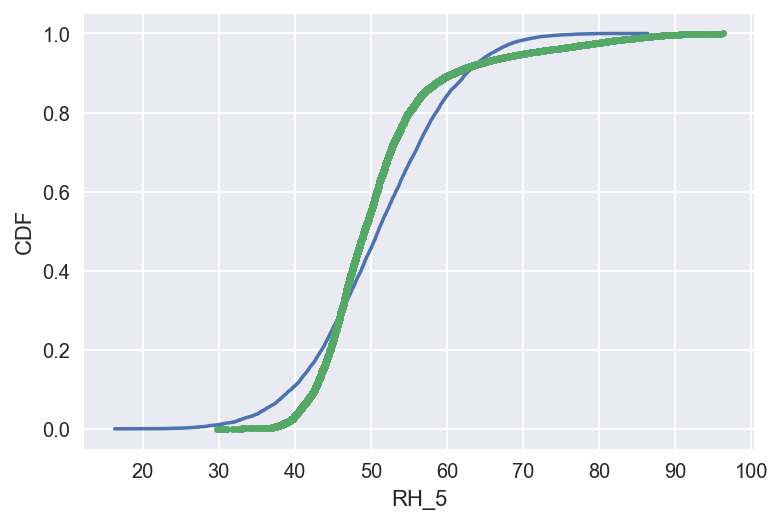

In [24]:
mean = np.mean(phase1['RH_5'])
std = np.std(phase1['RH_5'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['RH_5'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_5')
_=plt.ylabel('CDF')
plt.show()

### RH_6

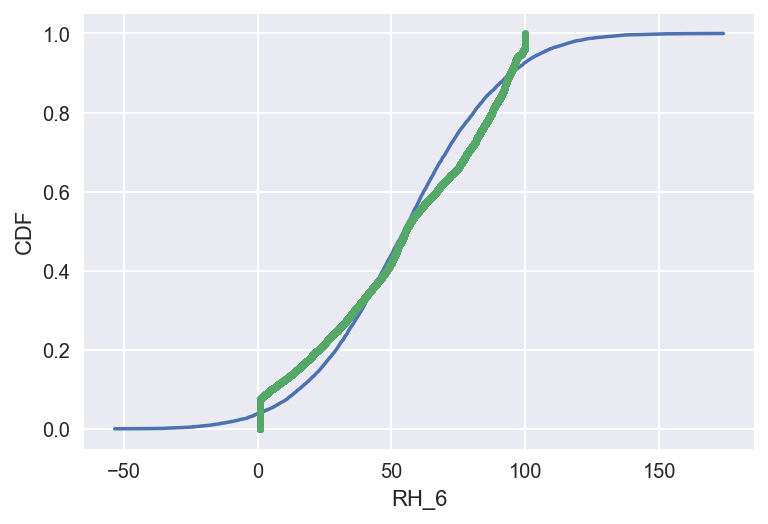

In [25]:
mean = np.mean(phase1['RH_6'])
std = np.std(phase1['RH_6'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['RH_6'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_6')
_=plt.ylabel('CDF')
plt.show()

### RH_7

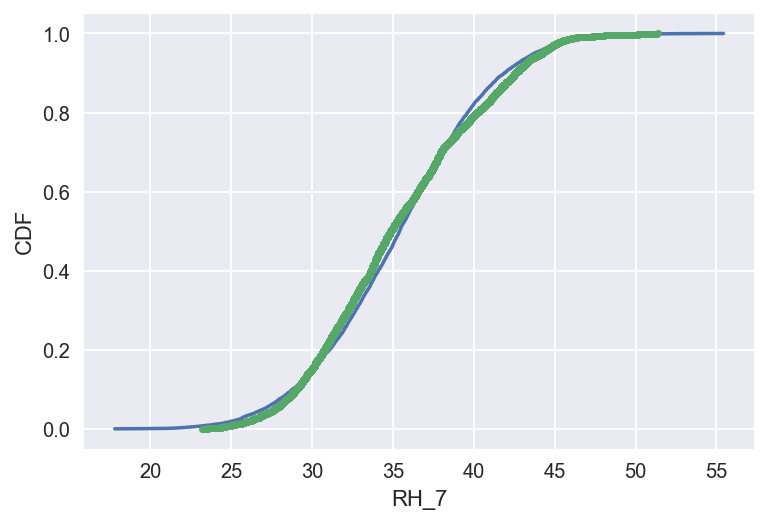

In [26]:
mean = np.mean(phase1['RH_7'])
std = np.std(phase1['RH_7'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['RH_7'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_7')
_=plt.ylabel('CDF')
plt.show()

### RH_8

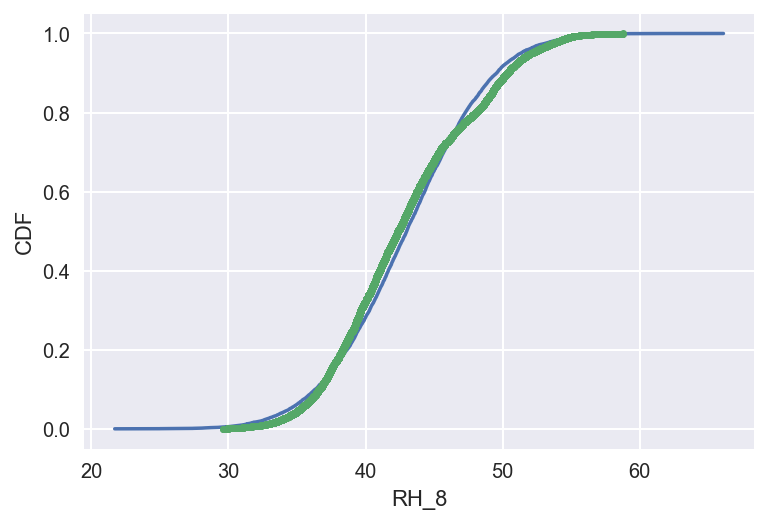

In [27]:
mean = np.mean(phase1['RH_8'])
std = np.std(phase1['RH_8'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['RH_8'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_8')
_=plt.ylabel('CDF')
plt.show()

### RH_9

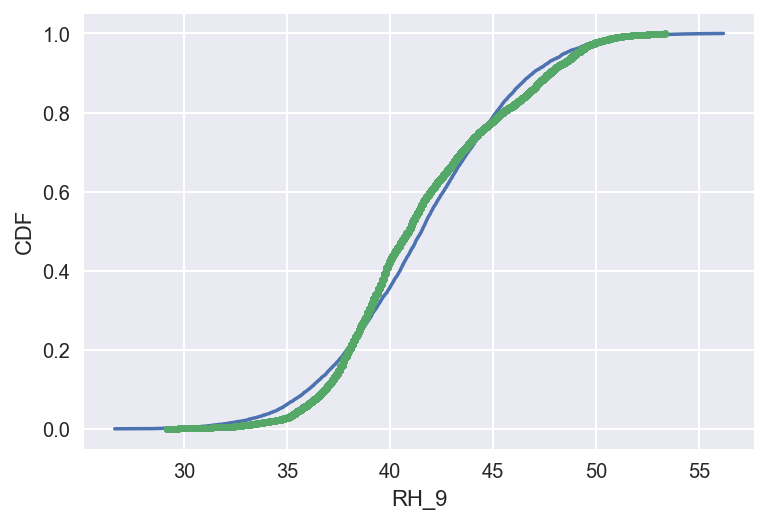

In [28]:
mean = np.mean(phase1['RH_9'])
std = np.std(phase1['RH_9'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['RH_9'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_9')
_=plt.ylabel('CDF')
plt.show()

### RH_out

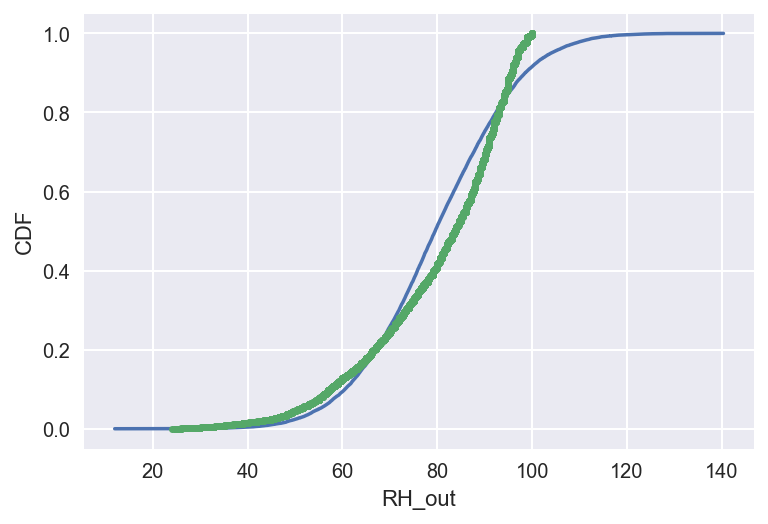

In [29]:
mean = np.mean(phase1['RH_out'])
std = np.std(phase1['RH_out'])
samples = np.random.normal(mean,std,size = 19735)
x,y = ecdf(phase1['RH_out'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('RH_out')
_=plt.ylabel('CDF')
plt.show()

### Press_mm_hg

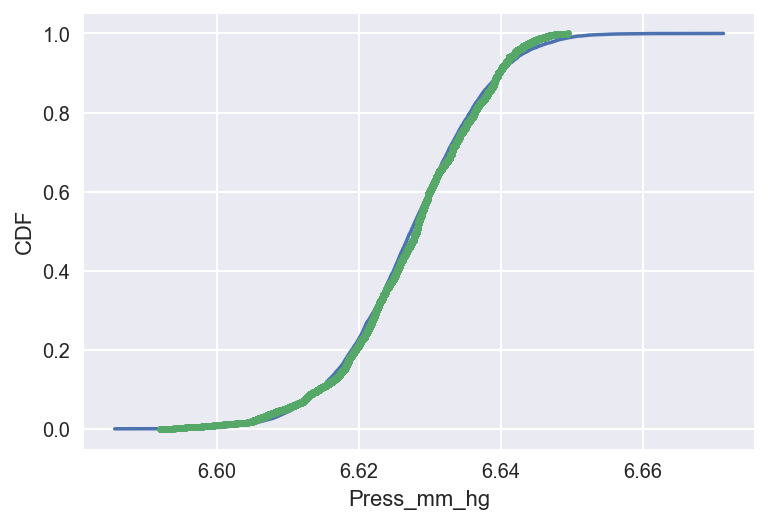

In [30]:
mean = np.mean(phase1['Press_mm_hg'])
std = np.std(phase1['Press_mm_hg'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['Press_mm_hg'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('Press_mm_hg')
_=plt.ylabel('CDF')
plt.show()

### Windspeed

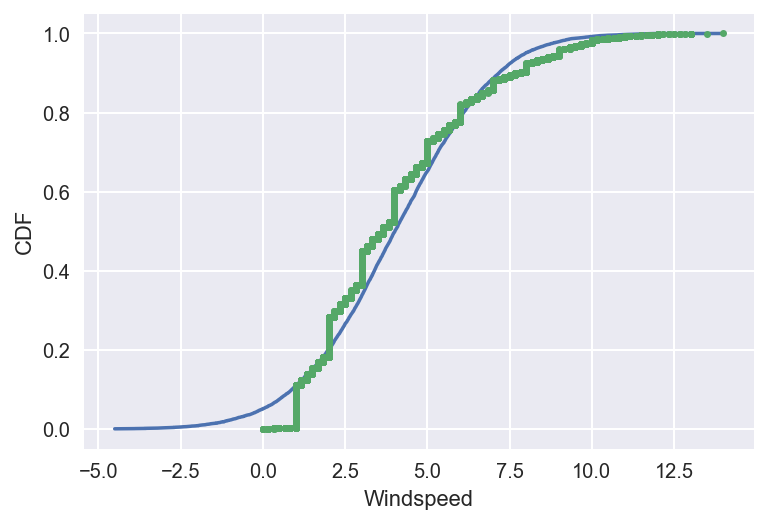

In [31]:
mean = np.mean(phase1['Windspeed'])
std = np.std(phase1['Windspeed'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['Windspeed'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('Windspeed')
_=plt.ylabel('CDF')
plt.show()

### Visibility

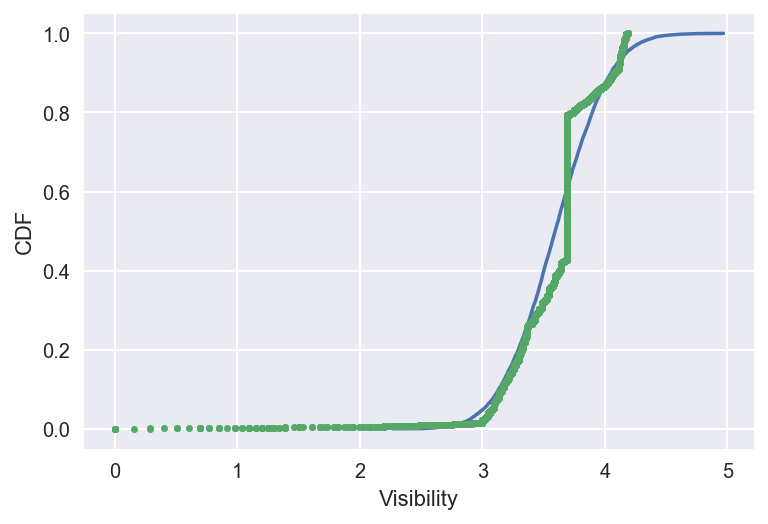

In [32]:
mean = np.mean(phase1['Visibility'])
std = np.std(phase1['Visibility'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['Visibility'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('Visibility')
_=plt.ylabel('CDF')
plt.show()

### Tdewpoint

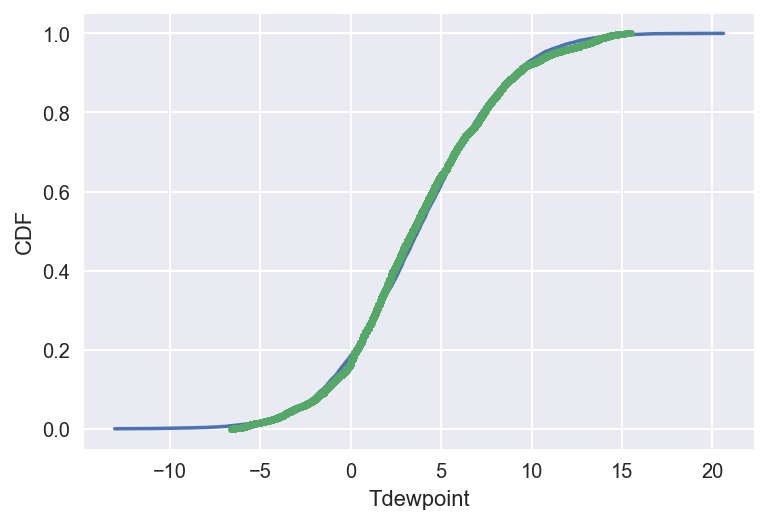

In [33]:
mean = np.mean(phase1['Tdewpoint'])
std = np.std(phase1['Tdewpoint'])
samples = np.random.normal(mean,std,size = 10000)
x,y = ecdf(phase1['Tdewpoint'])
x_theor,y_theor = ecdf(samples)
sns.set()
_=plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('Tdewpoint')
_=plt.ylabel('CDF')
plt.show()

## 1.8 Profiling

In [34]:
import pandas_profiling
pandas_profiling.ProfileReport(phase1)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/pandas_profiling/base.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/rishabhjain/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/rishabhjain/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/ipyke

Number of variables,33
Number of observations,19735
Total Missing (%),0.0%
Total size in memory,5.0 MiB
Average record size in memory,264.0 B
Numeric,29
Categorical,0
Date,0
Text (Unique),1
Rejected,3
Distinct count,92
